<a href="https://colab.research.google.com/github/senthilv83/Data-Science-Challenges/blob/main/Time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving new_ts.csv to new_ts (1).csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['new_ts.csv']))

In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 0 to 191
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      192 non-null    object 
 1   turnover  192 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.5+ KB


In [ ]:
df['date']= pd.to_datetime(df['date'])

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Test MSE: 34.831


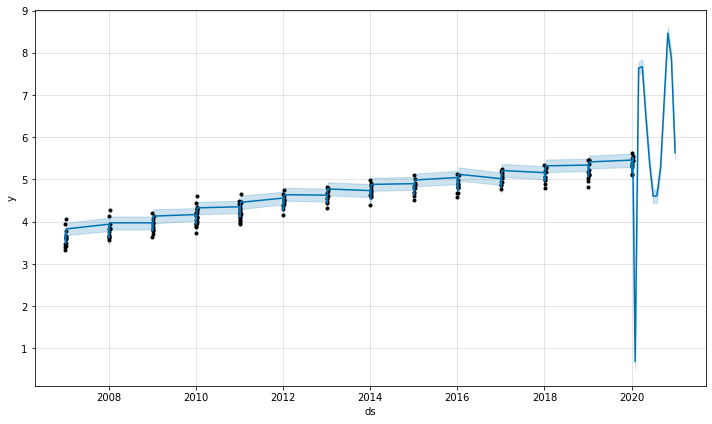

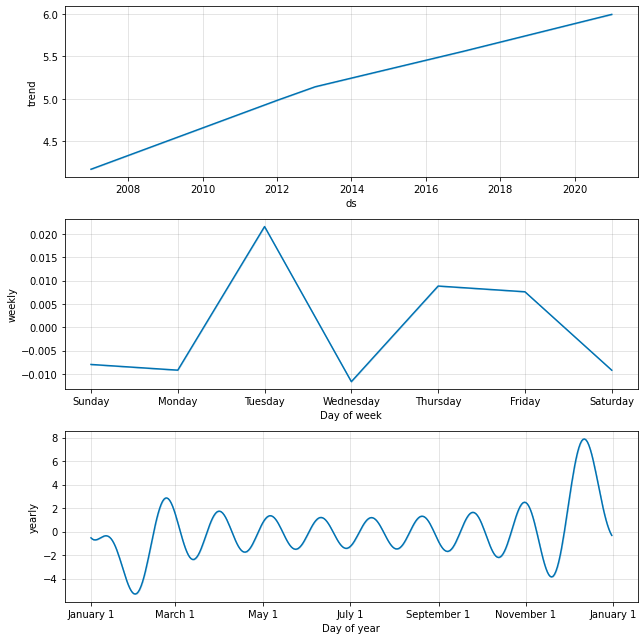

In [ ]:
from prophet import Prophet
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error


df = df.rename(columns={'turnover': 'y', 'date':'ds'})
df['y_orig'] = df['y']
df['y'] = np.log(df['y'])


model = Prophet()
model.fit(df)

future_data = model.make_future_dataframe(periods=12, freq = 'M')

forecast_data = model.predict(future_data)

forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

model.plot(forecast_data)

model.plot_components(forecast_data)



forecast_data_orig = forecast_data # make sure we save the original forecast data
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])


df['y_log']=df['y'] #copy the log-transformed data to another column
df['y']=df['y_orig']


final_df = pd.DataFrame(forecast_data_orig)


rmse = mean_squared_error(df["y_orig"].iloc[180:], final_df['yhat'].iloc[155:167])**0.5
print('Test MSE: %.3f' % rmse)


In [ ]:
import numpy as np

series = df['turnover'].values
series = series.astype('float32')

train_size = int(len(series) * 0.67)
test_size = len(series) - train_size
train, test = series[0:train_size], series[train_size:len(series)]
print(len(train), len(test))

def create_series(series, look_back=1):
	dataX, dataY = [], []
	for i in range(len(series)-look_back-1):
		a = series[i:(i+look_back)]
		dataX.append(a)
		dataY.append(series[i + look_back])
	return np.array(dataX), np.array(dataY)

look_back = 1
trainX, trainY = create_series(train, look_back)
testX, testY = create_series(test, look_back)

model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)


128 64
Epoch 1/100
126/126 - 2s - loss: 6071.2954 - 2s/epoch - 17ms/step
Epoch 2/100
126/126 - 0s - loss: 6007.5532 - 184ms/epoch - 1ms/step
Epoch 3/100
126/126 - 0s - loss: 5954.3052 - 184ms/epoch - 1ms/step
Epoch 4/100
126/126 - 0s - loss: 5912.0586 - 197ms/epoch - 2ms/step
Epoch 5/100
126/126 - 0s - loss: 5870.1187 - 186ms/epoch - 1ms/step
Epoch 6/100
126/126 - 0s - loss: 5828.4946 - 194ms/epoch - 2ms/step
Epoch 7/100
126/126 - 0s - loss: 5786.9795 - 186ms/epoch - 1ms/step
Epoch 8/100
126/126 - 0s - loss: 5745.7402 - 227ms/epoch - 2ms/step
Epoch 9/100
126/126 - 0s - loss: 5704.8120 - 197ms/epoch - 2ms/step
Epoch 10/100
126/126 - 0s - loss: 5663.9336 - 188ms/epoch - 1ms/step
Epoch 11/100
126/126 - 0s - loss: 5593.6221 - 204ms/epoch - 2ms/step
Epoch 12/100
126/126 - 0s - loss: 5526.5283 - 219ms/epoch - 2ms/step
Epoch 13/100
126/126 - 0s - loss: 5466.0547 - 178ms/epoch - 1ms/step
Epoch 14/100
126/126 - 0s - loss: 5408.7686 - 190ms/epoch - 2ms/step
Epoch 15/100
126/126 - 0s - loss: 5353

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# calculate root mean squared error
trainScore = mean_squared_error(trainY[-12:], trainPredict[-12:])**0.5
print('Train Score: %.2f RMSE' % (trainScore))
testScore = mean_squared_error(testY[-12:], testPredict[-12:])**0.5
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 85.84 RMSE
Test Score: 186.07 RMSE
